In [13]:
import numpy as np
import pandas as pd
import cv2
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [14]:
face_model = cv2.CascadeClassifier('C:/Users/Damien/Desktop/Data Science Projects/opencv/data/haarcascades/haarcascade_frontalface_default.xml')

In [15]:
print(face_model.empty())

False


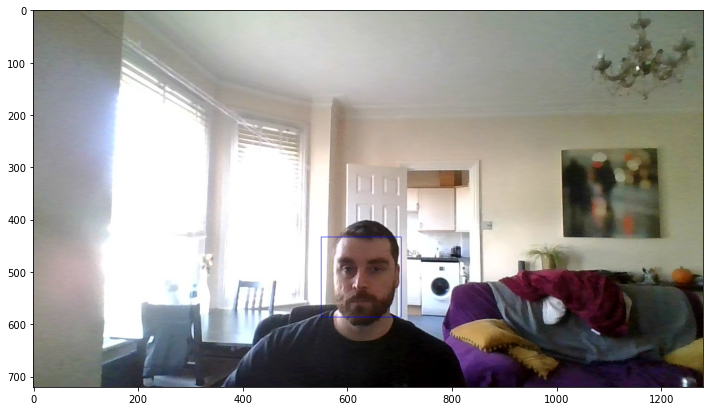

In [17]:
img = cv2.imread('C:/Users/Damien/Desktop/Data Science/Data Science Projects/Flask - Model/WIN_20210223_09_15_33_Pro.jpg')
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4)
out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

In [ ]:
model = keras.models.load_model('C:/Users/Damien/Desktop/Data Science/Data Science Projects/Flask - Model/masknet.h5')

In [ ]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

In [ ]:
new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
label = [0 for i in range(len(faces))]
for i in range(len(faces)):
    (x,y,w,h) = faces[i]
    crop = new_img[y:y+h,x:x+w]
    crop = cv2.resize(crop,(150,150))
    crop = np.reshape(crop,[1,150,150,3])/255.0
    mask_result = model.predict(crop)
    cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
    cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
plt.figure(figsize=(10,10))
plt.imshow(new_img)

In [ ]:
new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
label = [0 for i in range(len(faces))]
for i in range(len(faces)):
    (x,y,w,h) = faces[i]
    crop = new_img[y:y+h,x:x+w]
    crop = cv2.resize(crop,(150,150))
    crop = np.reshape(crop,[1,150,150,3])/255.0
    mask_result = model.predict(crop)
    cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-5),cv2.FONT_HERSHEY_SIMPLEX,0.4,dist_label[mask_result.argmax()],1)
    cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[mask_result.argmax()],2)
plt.figure(figsize=(10,10))
plt.imshow(new_img)

In [ ]:
img = cv2.imread('../input/faces-test/faces.jpg')
new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
label = [0 for i in range(len(faces))]
for i in range(len(faces)):
    (x,y,w,h) = faces[i]
    crop = new_img[y:y+h,x:x+w]
    crop = cv2.resize(crop,(150,150))
    crop = np.reshape(crop,[1,150,150,3])/255.0
    mask_result = model.predict(crop)
    cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-5),cv2.FONT_HERSHEY_SIMPLEX,0.4,dist_label[mask_result.argmax()],1)
    cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[mask_result.argmax()],2)
plt.figure(figsize=(10,10))
plt.imshow(new_img)